In [1]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm
import pandas as pd
import numpy as np
import gzip
import json
import math
from datetime import datetime
from IPython.display import display
%matplotlib inline

In [2]:
currency_pairs = ['USDT_BTC', 'BTC_ETH', 'BTC_XMR', 'BTC_XRP', 'BTC_FCT', 'BTC_NAV', 'BTC_DASH', 'BTC_MAID', 'BTC_ZEC']
currency_pair = currency_pairs[0]

In [3]:
folder = '../data/'
files = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(folder)) for f in fn]
datafiles = sorted([f for f in files if f.endswith('.log.gz')])
print("Number of datafiles to extract from: {}".format(len(datafiles)))
print("First file: {}".format(datafiles[0]))
print("Last file : {}".format(datafiles[-1]))

Number of datafiles to extract from: 80832
First file: ../data/2016-11-08/poloniex_full_2016-11-08T10:00:09.955811.log.gz
Last file : ../data/2017-01-03/poloniex_full_2017-01-03T14:07:04.564472.log.gz


In [4]:
from manage_orderbooks import *
from orderbook_trade_simulator import *

In [5]:
filename = '../data/snapshots/orderbooks_USDT_BTC_range1.15_samplesNone_snapshot2016-12-15T15:09.dict'
orderbooks, timestamps = load_orderbook_snapshot(infile=filename, first_line=0, last_line=1000)
# display(timestamps)
print(len(orderbooks[0]))

# orderbooks = orderbooks[:1000]

100%|██████████| 1000/1000 [00:12<00:00, 77.19it/s]

Loaded Orderbooks: 1000
908


 10%|█         | 1/10 [00:00<00:01,  6.18it/s]

Period 1: volume=40, limit=706


 10%|█         | 1/10 [00:00<00:01,  5.52it/s]

volume_of_last_trade_period 6.85811759
Period 2: volume=33.14188241, limit=707


  0%|          | 0/10 [00:00<?, ?it/s]

volume_of_last_trade_period 8.37885747
Period 3: volume=24.76302494, limit=708


 90%|█████████ | 9/10 [00:02<00:00,  3.77it/s]

No shares left at t=9, Done!
volume_of_last_trade_period 24.76302494
Done after 3 order_periods


 #####   TRADE Number 30   #####
Purchase history


{'705.0': 1.2e-05,
 '705.45': 6.858105590000001,
 '706.17': 0.052837839999999997,
 '706.19': 0.64532266000000005,
 '706.41': 0.045817419999999998,
 '706.81': 7.5297190599999997,
 '706.89': 0.10516049,
 '707.15': 6.8150697800000017,
 '707.18': 7.9885557299999999,
 '707.33': 0.26000000000000001,
 '707.5': 0.00042999999999999999,
 '707.52': 8.0477047200000005,
 '707.6': 0.00011,
 '707.61': 0.0027245099999999999,
 '707.7': 0.00068999999999999997,
 '707.8': 0.00075000000000000002,
 '707.82': 0.0030015100000000002,
 '707.83': 0.0066845100000000003,
 '707.84': 1.63626418,
 '707.9': 0.00084000000000000003,
 '708.0': 0.00020000000000000001}

Sell history


{}

Last trade


{'707.15': 6.8150697800000017}

Cashflow: -28275.4513592 (Avg: -706.88628398, Low: 705.0, High: 708.0)
Traded: 40.0/40.0 shares
Spread: 3.99 (bid: 704.11, ask: 708.1)
Adjusted Orderbook:


,Amount,Price,Type,Volume,VolumeAcc,norm_Price
989,0.001250,703.700000,bid,0.879625,3383.089266,0.996597
990,1.621835,703.710000,bid,1141.301226,3382.209641,0.996611
991,3.182611,704.110000,bid,2240.908414,2240.908414,0.997177
992,0.000000,706.103121,center,0.000000,0.000000,1.000000
1011,0.000770,708.100000,ask,0.545237,0.545237,1.002828
1012,0.403454,708.180000,ask,285.717770,286.263007,1.002941
1013,0.000640,708.200000,ask,0.453248,286.716255,1.002970


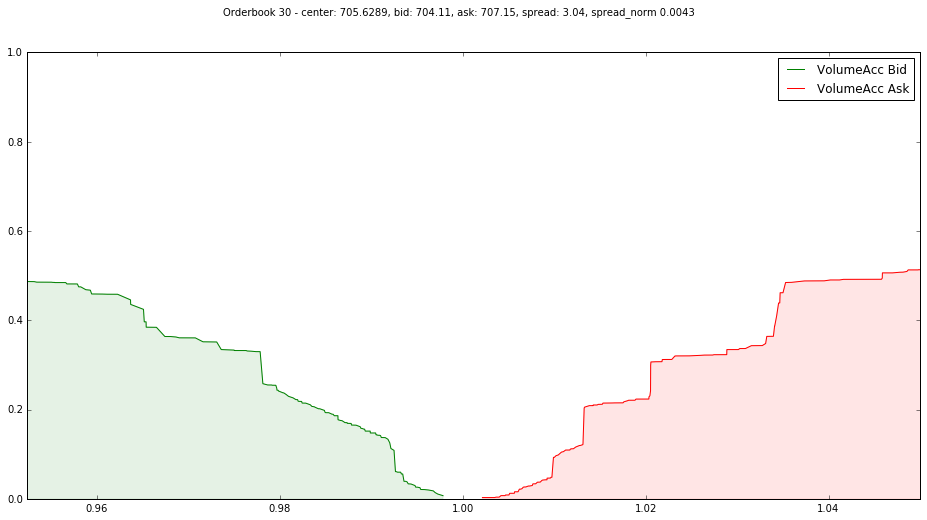

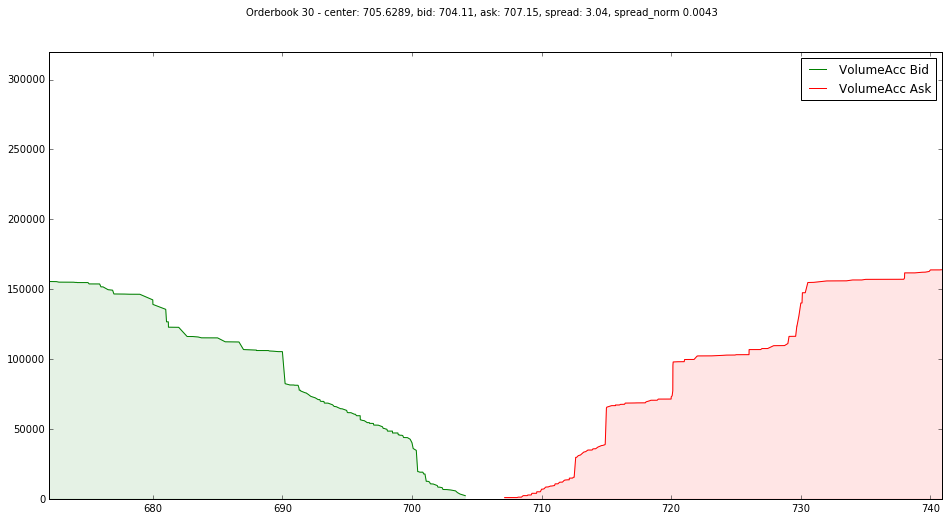

In [10]:
ots = OrderbookTradingSimulator()

vol = 40
period_length = 10
lim = 706
order_periods = 10


ob = orderbooks[0]

for i in range(order_periods):
    must_trade = False
    if i == order_periods-1:
        must_trade = True
    
    print("Period {}: volume={}, limit={}".format(i+1, vol, lim))
    new_ob = ots.trade_timespan(orderbooks[0:period_length], volume=vol, limit=lim, verbose=False, must_trade=must_trade, timespan=period_length)
    vol -= ots.volume_of_last_trade_period
    print("volume_of_last_trade_period {}".format(ots.volume_of_last_trade_period))
    

    if vol > 0:
        lim += 1
    elif vol < 0:
        lim -= 1
    else:
        print("Done after {} order_periods".format(i+1))
        break
ots.summarize(new_ob)
    

# new_ob = ots.trade_timespan(orderbooks[timespan:timespan+timespan], volume=vol, limit=706, verbose=True, timespan=timespan)
plot_orderbook(new_ob, title = "Orderbook {}".format(ots.t), normalized=True, range_factor=1.05)
plot_orderbook(new_ob, title = "Orderbook {}".format(ots.t), normalized=False, range_factor=1.05)

In [ ]:
ots = OrderbookTradingSimulator()

vol = 2

ob = orderbooks[0]
new_ob = ots.trade(orderbooks[0], volume=vol, limit=None, verbose=True)
plot_orderbook(new_ob, title = "Orderbook {}".format(ots.t), normalized=True, range_factor=1.05)
trade_counter = 1

In [ ]:
center = orderbooks[0][orderbooks[0].Type=='center'].Price.values[0]
bid = orderbooks[0][orderbooks[0].Type=='bid'].Price.values[-1]
ask = orderbooks[0][orderbooks[0].Type=='ask'].Price.values[0]
print("Bid:    {}".format(bid))
print("Center: {}".format(center))
print("Ask:    {}\n".format(ask))

result = 0
trade_vol = -10
limit=704
trade_info = place_order(orderbooks[0], trade_vol, limit=limit)
cash_flow = trade_info['cashflow']
trade_vol -= trade_info['amount_fulfilled']

display(trade_info)
display(orderbook_preview(ob, 3))

#cash_flow = 0
minute = 1
for i, ob in enumerate(orderbooks[1:]):
    if abs(trade_vol) < 1.0e-10:
        break
        
    
    print("timesteps: {} ==> {}, {}".format(minute, cash_flow, trade_vol))
    if abs(trade_vol) > 1.0e-10 and i == len(orderbooks[1:])-1:
        print("TRADE!!!")
        # trade always in last Timestep
        trade_info = place_order(ob,  trade_vol, limit=None, trade_history=trade_info['trade_history'])
        cash_flow += trade_info['cashflow']
        trade_vol -= trade_info['amount_fulfilled']
    
    elif abs(trade_vol) > 1.0e-10:
        print("trade_vol", trade_vol)
        trade_info = place_order(ob,  trade_vol, limit=limit, trade_history=trade_info['trade_history'])
        cash_flow += trade_info['cashflow']
        trade_vol -= trade_info['amount_fulfilled']

    display(trade_info)
    
    minute += 1
    
    print("")
    
    print("trade_vol: {:1.4f}, center: {:1.4f}, limit: {}".format(trade_vol, ob[ob.Type=='center'].Price.values[0], limit))
print("timesteps: {} ==> {}, {}".format(minute, cash_flow, trade_vol))

display(orderbook_preview(ob, 3))

In [ ]:
range_factor = 1.01
# plot_orderbook(data[0], normalized=True, range_factor=range_factor)
print(len(orderbooks))
for idx in [1, 5000, 25000, -1]:
    print(idx, timestamps[idx])
    display(orderbook_preview(orderbooks[idx], 3))
    plot_orderbook(orderbooks[idx], title=timestamps[idx], normalized=True, range_factor=range_factor)